In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [2]:
ads_data = pd.read_csv('lesson_5_ads_data.csv.zip', compression="zip")

In [5]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [6]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [47]:
ads_data

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793,2019-04-01 00:00:48
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041,2019-04-01 16:24:26
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41,2019-04-01 16:24:26
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898,2019-04-01 16:24:26
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29,2019-04-01 16:24:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176709,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,5467,2019-04-05 21:51:32
3176710,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,android,199.4,239408,2508,2019-04-05 21:51:32
3176711,112583,1554501092,click,2019-04-06,CPM,0,111818,112260,web,199.4,239408,7896,2019-04-05 21:51:32
3176712,112583,1554501092,view,2019-04-06,CPM,0,111818,112260,ios,199.4,239408,4319,2019-04-05 21:51:32


In [ ]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


<AxesSubplot: xlabel='date'>

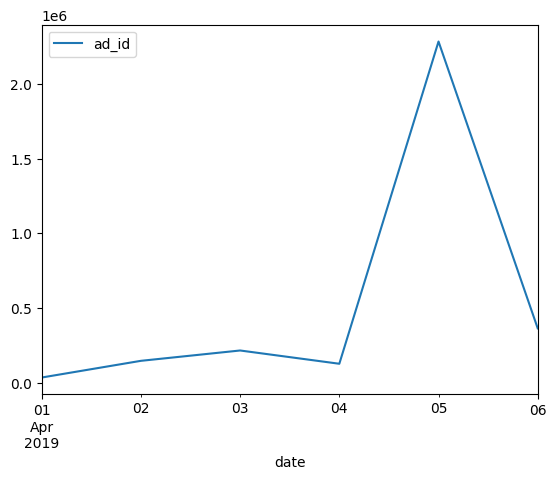

In [8]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [10]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id').reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [14]:
ads_data.client_union_id.nunique()

336

In [15]:
ads_data.campaign_union_id.nunique()

349

In [16]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()

,time
ad_id,
112583,2166611
29927,27186
44635,8268
46583,7327
44956,5656


In [17]:
ad_id = 112583

In [18]:
ads_data.query('ad_id == @ad_id').head(1)


,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
527124,112583,1554480636,view,2019-04-05,CPM,0,111818,112260,web,199.4,239408,4355,2019-04-05 16:10:36


In [19]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

In [20]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

In [21]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [22]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event,ad_id,click,view,ctr,ctr_per
289,112583,580436.0,1934788.0,0.300000,29.999979
324,119450,258.0,1254.0,0.205742,20.574163
125,38575,43.0,257.0,0.167315,16.731518
144,40968,29.0,217.0,0.133641,13.364055
207,45642,42.0,344.0,0.122093,12.209302
283,110924,11.0,95.0,0.115789,11.578947
194,45043,28.0,245.0,0.114286,11.428571
96,35034,112.0,997.0,0.112337,11.233701
5,4585,53.0,476.0,0.111345,11.134454
328,120347,236.0,2168.0,0.108856,10.885609


In [23]:
ads_data_by_ad.ctr.mean()

0.020628096080757954

In [24]:
ads_data_by_ad.ctr.median()

0.010753240746688594

/var/folders/m2/mz1wfh057l302_qhtpqyx0r00000gn/T/ipykernel_47148/279935430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ads_data_by_ad.ctr, kde=False)


<AxesSubplot: xlabel='ctr'>

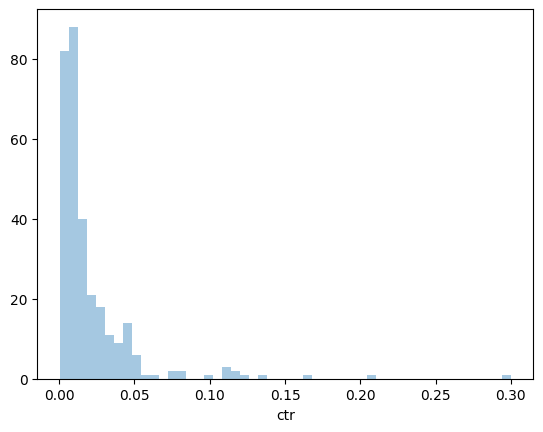

In [25]:
sns.distplot(ads_data_by_ad.ctr, kde=False)

In [26]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [27]:
ads_data_by_ad = ads_data_by_ad.fillna(0)

In [28]:
ads_ids_bug = ads_data_by_ad.query('click == 0').ad_id

In [29]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,1988
1,ios,3075
0,android,4906


In [30]:
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

,platform,ad_id
2,web,635425
1,ios,953078
0,android,1588211


In [46]:
ads_data_by_ad

event,ad_id,click,view,ctr,ctr_per,has_video
0,3,9.0,490.0,0.018367,1.836735,0
1,2132,1.0,95.0,0.010526,1.052632,0
2,2276,2.0,1454.0,0.001376,0.137552,0
3,2475,0.0,132.0,0.000000,0.000000,0
4,2643,3.0,286.0,0.010490,1.048951,0
...,...,...,...,...,...,...
350,121941,1.0,640.0,0.001563,0.156250,0
351,121943,15.0,1722.0,0.008711,0.871080,0
352,122042,1.0,155.0,0.006452,0.645161,0
353,122063,1.0,260.0,0.003846,0.384615,0


In [31]:
# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [39]:
ads_data_by_ad["has_video"]= ads_data.has_video

In [44]:
ads_data_by_ad.query("has_video == 1")

event,ad_id,click,view,ctr,ctr_per,has_video


In [33]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)

In [34]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [35]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [ ]:
# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у 
# CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?


In [146]:
x = pd.Series([1, 2, 3])

In [143]:
import numpy as np

In [151]:
ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')].ad_cost.sum()

84810.0

In [154]:
ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')].ad_cost.sum() / 1000

497090.6778000003

In [155]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [159]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event,ad_id,click,view
27,16548,1.554336e+09,1.554336e+09
81,30939,1.554165e+09,1.554173e+09
138,40464,1.554164e+09,1.554164e+09
158,42007,1.554423e+09,1.554423e+09
185,44543,1.554336e+09,1.554337e+09
201,45436,1.554336e+09,1.554336e+09
324,119450,1.554336e+09,1.554336e+09


In [161]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id,full_date
512690,16548,1554336083,click,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4133,2019-04-04 00:01:23
511482,16548,1554336278,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,3736,2019-04-04 00:04:38
511439,16548,1554336352,view,2019-04-04,CPM,0,722,16523,android,196.6,53199,4968,2019-04-04 00:05:52
511438,16548,1554336352,view,2019-04-04,CPM,0,722,16523,ios,196.6,53199,4206,2019-04-04 00:05:52
511437,16548,1554336352,view,2019-04-04,CPM,0,722,16523,web,196.6,53199,3898,2019-04-04 00:05:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056433,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,3613,2019-04-04 23:57:45
2056432,16548,1554422265,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,6044,2019-04-04 23:57:45
2056461,16548,1554422308,view,2019-04-05,CPM,0,722,16523,ios,196.6,53199,5831,2019-04-04 23:58:28
2056652,16548,1554422338,view,2019-04-05,CPM,0,722,16523,android,196.6,53199,2837,2019-04-04 23:58:58
